In [3]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import shap
from scipy import stats

In [13]:
# df = pd.read_csv('.//downloads//merged_gen_v4.csv')
# df = pd.read_csv('.//downloads//U_bend.csv')
# df = pd.read_csv('ubend_gen_v4.csv')
for i in df.columns:
    if df[i].dtype is not np.float64:
        df[i] = df[i].astype(np.float64)
print(df.columns)
print(df['B4TOD4'].unique(),'B4TOD4')
print(df['B5TOB4'].unique(),'B5TOB4')
print(df['R45TOB4'].unique(),'R45TOB4')
print(df['OMEGA5'].unique(),'OMEGA5')
print(df['GAMMAU'].unique(),'GAMMAU')
print(df['ALPHA4'].unique(),'ALPHA4')
print(df['RE'].unique(),'RE')
df = df.drop(columns=df.loc[:, ('B5TOB4','OMEGA5')].columns)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(len(X))
print(y)
train_X,test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

Index(['B4TOD4', 'B5TOB4', 'R45TOB4', 'OMEGA5', 'GAMMAU', 'ALPHA4', 'RE',
       'PT_LOSS'],
      dtype='object')
[0.005 0.02  0.1  ] B4TOD4
[1.25 1.   1.5 ] B5TOB4
[0.9 5.  2.5] R45TOB4
[-5.  5.  0.] OMEGA5
[-0.5  0.5  0. ] GAMMAU
[10. 30. 60. 20. 40. 50.] ALPHA4
[100000. 500000.] RE
1342
0       0.109443
1       0.084918
2       0.049895
3       0.038989
4       0.047602
          ...   
1337    0.240800
1338    0.237800
1339    0.182700
1340    0.203000
1341    0.159800
Name: PT_LOSS, Length: 1342, dtype: float64


In [102]:
rforest = RandomForestRegressor(n_estimators=1000, random_state=0, oob_score=True)

rforest.fit(train_X, train_y)

# Training the model


# Making predictions
# y_pred = regressor.predict(test_X)
# pred_train = regressor.predict(train_X)
# # Evaluating the model
# mse = mean_squared_error(test_y, y_pred)
# print(f'Mean Squared Error: {mse}')
# print(f'Mean Absolute Error: {mean_absolute_error(test_y, y_pred)}')
# print(f'train_x Mean Absolute Erro: {mean_absolute_error(train_y, pred_train)}')
# # Plotting the results
# plt.scatter(test_y, y_pred, alpha=0.3)
# plt.xlabel('True Values')
# plt.ylabel('Predicted Values')
# plt.title('Gradient Boosting for Linear Regression')
# plt.show()

RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=0)

In [103]:
# Create a SHAP explainer
explainer = shap.Explainer(rforest, test_X)

# Calculate SHAP values for the test set
shap_values = explainer(test_X)

 99%|===================| 399/403 [01:02<00:00]        

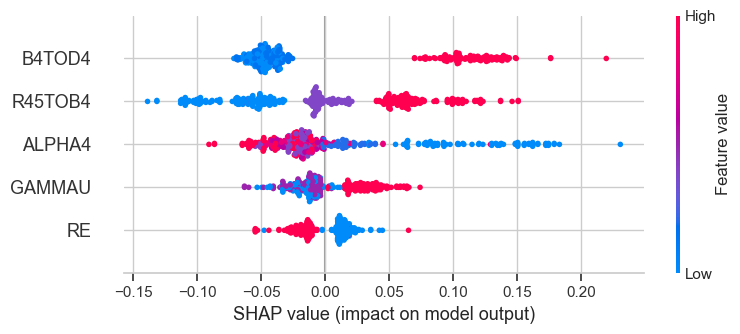

In [104]:
shap.summary_plot(shap_values, test_X)

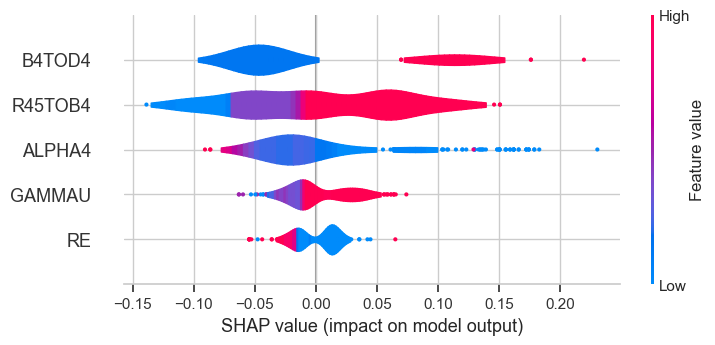

In [105]:
shap.plots.violin(shap_values)

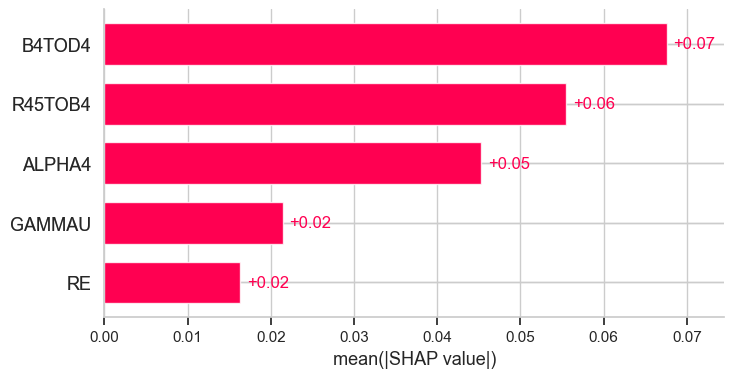

In [106]:
shap.plots.bar(shap_values)

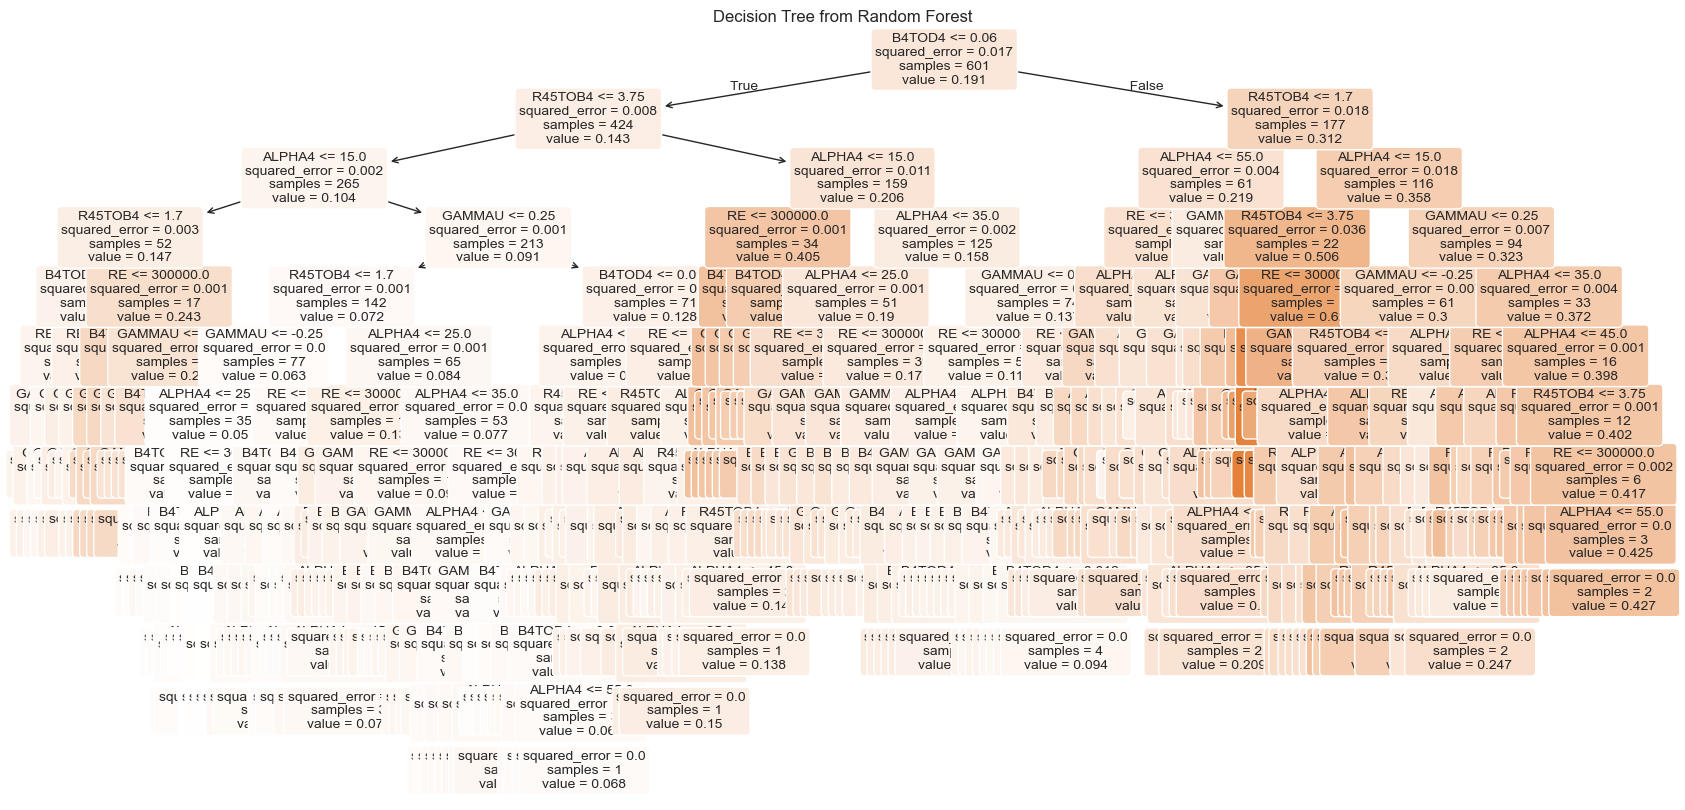

In [107]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = rforest.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [108]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_X.values, feature_names=X.columns, class_names=['PT_LOSS'], verbose=True, mode='regression')
i = 33  # пример для интерпретации
exp = explainer.explain_instance(test_X.iloc[i].values, rforest.predict, num_features=7)

exp.as_list()

C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 0.14221123644496175
Prediction_local [0.30920415]
Right: 0.2512733929047645


[('0.02 < B4TOD4 <= 0.10', 0.15788264830049384),
 ('2.50 < R45TOB4 <= 5.00', 0.10259607090945168),
 ('100000.00 < RE <= 500000.00', -0.034903601448078615),
 ('30.00 < ALPHA4 <= 50.00', -0.03371906521435914),
 ('-0.50 < GAMMAU <= 0.00', -0.02486313913774751)]

In [109]:
exp.show_in_notebook(show_table=True)

In [110]:
# fs = FeatureSelector(data = train_X, labels = train_y)

In [111]:
# res = stats.pearsonr(train_X, test_y)

In [112]:
import seaborn

<Axes: xlabel='R45TOB4', ylabel='B4TOD4'>

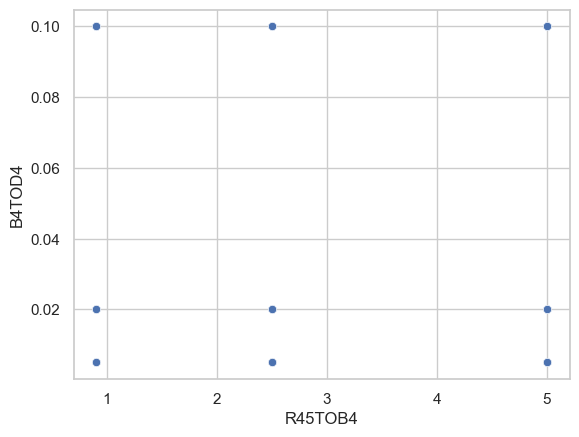

In [113]:
seaborn.set(style='whitegrid')
fmri = seaborn.load_dataset("fmri")
 
seaborn.scatterplot(x="R45TOB4",
                    y="B4TOD4",
                    data=df)

In [114]:
df.corr()

,B4TOD4,R45TOB4,GAMMAU,ALPHA4,RE,PT_LOSS
B4TOD4,1.000000,0.001185,-0.001402,0.005980,-0.000528,0.534439
R45TOB4,0.001185,1.000000,-0.001112,0.000313,-0.000105,0.470075
GAMMAU,-0.001402,-0.001112,1.000000,-0.001295,-0.000918,0.125356
ALPHA4,0.005980,0.000313,-0.001295,1.000000,-0.000868,-0.358709
RE,-0.000528,-0.000105,-0.000918,-0.000868,1.000000,-0.115663
PT_LOSS,0.534439,0.470075,0.125356,-0.358709,-0.115663,1.000000
